In [275]:
import matplotlib.pyplot as plt
import networkx as nx
import classes as c

In [276]:
def node_label(position, cf, ctp):
  return str(position) + '-' + str(cf) + ',' + str(ctp)

## Pruning Functons

In [277]:
# TODO make function to process every node and edge for each index

# TODO comnime this with the funcction to find nodes and edges

def addNodeAndEdge(G, melodyData, prevIndex, posOverride = False):
  melody = melodyData["melody"]
  finalIndex = len(melody) - 1
  nextIndex = prevIndex + 1
  
  melody = melodyData['melody']
  prev1 = melody[prevIndex]
  
  if prevIndex != finalIndex:
    next1 = melody[nextIndex]
    next2s = melodyData[str(next1)]
    if posOverride:
      prev2s = posOverride
    else:
      prev2s = melodyData[str(next1)]
  elif(prevIndex == finalIndex):
    prev2s = posOverride
  else:
    next1 = None
    next2 = None
    prev2s = []
    next2s = []
  print("prev2s", prev2s)
  for prev2 in prev2s:
    prevStr = node_label(prevIndex, prev1, prev2)
    """ print(prevStr) """
    validMoves = []
    if(prevIndex < finalIndex):
      for next2 in next2s:
        if(c.isValidMove(prev1, next1, prev2, next2)):
          validMoves.append(next2)
      G.add_node(prevStr)
      for next2 in validMoves:
        nextStr = node_label(nextIndex, next1, next2)
        G.add_edge(prevStr, nextStr)

In [278]:

# remove nodes with no edges
def removeIsolates(G):
  isolates = list(nx.isolates(G))
  G.remove_nodes_from(isolates)

# TODO make the function find path to actual final node(s), not just the last node that exists
# TODO find out what makes this function too strong for purpose -- removes too many nodes
# TODO make the functions edit the nodes and edges arrays rather than changing the graph directly
def xTheNode(G, finalNote, finalIndex, finalNodes):
  strings = []
  remove = []
  for item in finalNodes:
    string = node_label(finalIndex, finalNote, item)
    strings.append(string)
    for node in G.nodes:
      for item in strings:
        if G.has_node(item):
          isPath = nx.has_path(G, str(node), str(item))
          """ print("node: " + node + " final: " + item) """
          if(not strings.__contains__(node)):
            if not isPath:
              remove.append(node)
              """  print(str(node) + ' failed') """
          else:
            print(str(node))
  for node in remove:
    G.remove_node(node)

def pruneLeaves(G, finalIndex):
  # pseudo code
  # get degrees for all nodes
  degrees = G.degree
  remove = [node for node,degree in dict(G.degree()).items() if degree < 2]
  for node in remove:
    # isolate index
    index = node.split("-")[0]
    #if string[0] is not the final index
    if(int(index) < finalIndex):
      # if string[0] is not 0
      if(index != 0):
        # remove all nodes with degree of 1
        G.remove_node(node)

# add funtion to remove edges not connected to nodes

In [279]:
def removeNodes(G, finalNote, finalIndex, finalNodes):
  """ print(finalIndex) """
  removeIsolates(G)
  xTheNode(G, finalNote, finalIndex, finalNodes)
  pruneLeaves(G, finalIndex)
  # too strong
  #add way to remove edges with no nodes

In [280]:
# check if moves are valid
""" def nextMoves(prev1, next1, prev2, posNext2): """

' def nextMoves(prev1, next1, prev2, posNext2): '

In [287]:
# rewrite a to form two arrays: nodes and edges, which will be passed to create_network()

def find_nodes_and_edges(melodyData):
  melody = melodyData['melody']
  curIndex = 0
  finalIndex = len(melody) - 1
  
  nodes = []
  
  
  
  edges = []
  
  
  return {'nodes': nodes, 'edges': edges}

""" 
once finished, pass the following to make_network:

nodes, edges = find_nodes_and_edges(melody_data)
make_network(nodes, edges)
""" 

def constructInitialGraph(melodyData):
  
  melody = melodyData['melody']
  G = nx.DiGraph()
  """ nx.draw_spectral(G) """
  curIndex = 0
  finalIndex = len(melody) - 1
  
  # generate first nodes
  note = melody[0]
  if melodyData['ctpIsAbove']:
    firstPosCtp = {note + 0, note + 4, note +7, note + 12, note + 16, note + 19}
    print(0)
  else:
    firstPosCtp = {note, note - 12}
    print(0)
  nextMoves = melodyData[str(melody[1])]
  addNodeAndEdge(G, melodyData, curIndex, firstPosCtp)
  
  curIndex += 1
  
  # TODO generate nodes by 0, 1 then 1, 2 then 2, 3
  #generate middle nodes
  for i in range(0, finalIndex - 1):
    note = melody[i]
    """ print(" cur: " + str(curIndex) + " fin: " + str(finalIndex)) """
    nextIndex = curIndex + 1
    nextMoves = []
    nextMoves = melodyData[str(melody[nextIndex])]
    """ print(nextMoves) """
    for possCtp in melodyData[str(note)]:
      validMoves = []
      possString = node_label(curIndex, note, possCtp)
      """ print(possString) """
      for move in nextMoves:
        isValid = c.isValidMove(note, melody[nextIndex], possCtp, move)
        if(isValid):
          validMoves.append(move)
      if validMoves:
        """ print(note, melody[nextIndex], melodyData[str(note)], validMoves) """
        moveString = node_label(nextIndex, melody[nextIndex], possCtp)
        G.add_node(moveString)
        for move in validMoves:
          G.add_edge(possString, moveString)
      else:
        if G.has_node(possString):
          G.remove_node(possString)
    curIndex = nextIndex
  
  # generate last nodes
  note = melody[finalIndex]
  if melodyData['ctpIsAbove']:
    finalCtp = {note, note + 12}
  else:
    finalCtp = {note, note - 12}
  
  addNodeAndEdge(G, melodyData, curIndex, finalCtp)
  """ removeNodes(G, melody[finalIndex], finalIndex, finalCtp)
  removeNodes(G, melody[finalIndex], finalIndex, finalCtp) """
  
  return G

In [283]:
def visualize(G):
  # Set the spring layout with custom node positions
  pos = nx.spring_layout(G, seed=42)

  #create dictionary of node indexes
  pos_nodes = G.nodes
  pos_node_x = {}
  for node in pos_nodes.items():
    node = node[0]
    index = node.split("-")[0]
    pos_node_x[node] = int(index)
    """ print(pos[node]) """

  # Set custom x-axis positions for nodes
  for node, x in pos_node_x.items():
      pos[node][0] = x
  
  nx.draw(G, pos, with_labels=True, arrows=True)
  plt.figure(figsize = (2^16,2^16))

In [281]:
import networkx as nx

def create_network(nodes, edges, willPrint=True):
  """
  input:
    1. nodes array ( form: [1,2,3] )
    2. edges array ( form: [(1,2),(2,3)] )
  output:
    a NetworkX graph"""
    
  graph = nx.Graph()
  graph.add_nodes_from(nodes)
  graph.add_edges_from(edges)
  
  # display nodes and edges unless otherwise specified
  if willPrint:
    print(graph.nodes)
    print(graph.edges)

  return graph

"""
For example, the following code creates a NetworkX graph with three nodes and two edges:

nodes = [1, 2, 3]
edges = [(1, 2), (2, 3)]

graph = create_network(nodes, edges)

print(graph.nodes) 
# [1, 2, 3]

print(graph.edges) 
# [(1, 2), (2, 3)] 
"""

'\nFor example, the following code creates a NetworkX graph with three nodes and two edges:\n\nnodes = [1, 2, 3]\nedges = [(1, 2), (2, 3)]\n\ngraph = create_network(nodes, edges)\n\nprint(graph.nodes) \n# [1, 2, 3]\n\nprint(graph.edges) \n# [(1, 2), (2, 3)] \n'

{'melody': [0, 2, 0], 'mode': [0, 2, 4, 5, 7, 9, 11], 'intervalToNext': [2, -2], 'ctpIsAbove': True, '0': [4, 7, 9, 12, 16, 19], '2': [5, 9, 11, 14, 21]}
0
prev2s {0, 4, 7, 12, 16, 19}
prev2s {0, 12}
DiGraph with 23 nodes and 28 edges


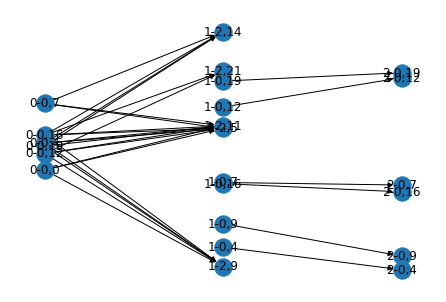

<Figure size 1296x1296 with 0 Axes>

In [284]:
from classes import getAllCombos

# error: generating incorrect nodes for final note

# only goes to index 2
combos = getAllCombos([0, 2, 0], True) # write a python line which calculates a sawtooth wave
print(combos)
G = constructInitialGraph(combos)

""" remove first digit and instead keep track of melody in a list """

visualize(G)
print(G)

In [285]:
import math

# reference pitch and reference number
ref = {
  'num': 49, # A4
  'freq': 440 # Hz
}

def TTET_freq(n):
  # distance from reference number 12√2
  target_num = n - ref['num'] 
  
  # distance between semitones: 12th root of 2 
  semitone = math.pow(2, 1 / 12)
  
  # ratio from reference frequency
  ratio = math.pow(semitone, target_num)
  
  # frequency
  freq = ref['freq'] * ratio
  
  return freq

""" print(TTET_freq(48)) """

' print(TTET_freq(48)) '

In [286]:
""" import networkx as nx
import matplotlib.pyplot as plt

# Create an empty ordered graph
G = nx.DiGraph()

# Add nodes to the graph
G.add_node("0,0,12")
G.add_node("1,2,9")
G.add_node("1,2,11")
G.add_node("2,0,12")

# Add edges to the graph
G.add_edge("0,0,12", "1,2,9")
G.add_edge("0,0,12", "1,2,11")
G.add_edge("1,2,9", "2,0,12")
G.add_edge("1,2,11", "2,0,12")

# Set the spring layout with custom node positions
pos = nx.spring_layout(G, seed=42)

print(pos)

#create dictionary of node indexes
pos_nodes = G.nodes
pos_node_x = {}
for node in pos_nodes.items():
  node = node[0]
  index = node.split(",")[0].replace("[", "")
  pos_node_x[node] = int(index)
  print(pos[node])

print(pos_node_x)

# Set custom x-axis positions for nodes
for node, x in pos_node_x.items():
  pos[node][0] = x

# Draw the ordered graph
nx.draw(G, pos, with_labels=True, arrows=True)

# Show the graph
plt.show()
 """

' import networkx as nx\nimport matplotlib.pyplot as plt\n\n# Create an empty ordered graph\nG = nx.DiGraph()\n\n# Add nodes to the graph\nG.add_node("0,0,12")\nG.add_node("1,2,9")\nG.add_node("1,2,11")\nG.add_node("2,0,12")\n\n# Add edges to the graph\nG.add_edge("0,0,12", "1,2,9")\nG.add_edge("0,0,12", "1,2,11")\nG.add_edge("1,2,9", "2,0,12")\nG.add_edge("1,2,11", "2,0,12")\n\n# Set the spring layout with custom node positions\npos = nx.spring_layout(G, seed=42)\n\nprint(pos)\n\n#create dictionary of node indexes\npos_nodes = G.nodes\npos_node_x = {}\nfor node in pos_nodes.items():\n  node = node[0]\n  index = node.split(",")[0].replace("[", "")\n  pos_node_x[node] = int(index)\n  print(pos[node])\n\nprint(pos_node_x)\n\n# Set custom x-axis positions for nodes\nfor node, x in pos_node_x.items():\n  pos[node][0] = x\n\n# Draw the ordered graph\nnx.draw(G, pos, with_labels=True, arrows=True)\n\n# Show the graph\nplt.show()\n '